**Logistic Regression**

**Student Name:** Prasanna Sundararajan Muthukumaran

**UTA ID:** 1001937587

In [1]:
# Importing all the necessary packages

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from mlxtend.plotting.decision_regions import plot_decision_regions
from sklearn.metrics import accuracy_score

%matplotlib widget

In [2]:
# Loading Iris dataset using scikit-learn
iris_df = load_iris()

In [3]:
iris_df

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
class LogisticRegression():
    # Initializing the class object
    def __init__(self, alpha, epochs):
        self.alpha = alpha
        self.epochs = epochs
    
    def fit(self, iris_data, iris_target):
        self.X = iris_data    # Data
        self.Y = iris_target    # Target
        self.N = iris_data.shape[0]    # Total number of samples  
        self.features = iris_data.shape[1]
        
        # Initializing weight vector and bias
        self.W = np.random.uniform(-1,1,size=(self.features,))    # Weight vector
        self.B = 0    # Bias
        self.gradient_descent()    # Calling gradient_descent function to come up with the optimal set of parameters
        
    def sigmoid(self, Z):
        return 1.0 / (1 + np.exp(-Z))
    
    def predict(self, X):
        y_hat = self.sigmoid(np.dot(X, self.W) + self.B)    # Hypothesis function
        prediction = np.where(y_hat > 0.5, 1, 0 )        
        return prediction
    
    def gradient_descent(self):
        for i in range(self.epochs):
            y_pred = self.sigmoid(np.dot(self.X, self.W) + self.B)    # Hypothesis function

            dW = (1/self.N) * np.dot(self.X.T, (y_pred - self.Y))
            dB = (1/self.N) * np.sum((y_pred - self.Y))

            # Updating weights and bias
            self.W = self.W - self.alpha * dW
            self.B = self.B - self.alpha * dB
            

Predicted Class: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Actual Class: [1 2 2 1 2 0 0 0 2 1 0 2 1 1 0]
Model Accuracy using petal length & petal width =  33.33333333333333 %

Predicted Class: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Actual Class: [1 2 2 1 2 0 0 0 2 1 0 2 1 1 0]
Model Accuracy using sepal length & sepal width =  33.33333333333333 %

Predicted Class: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Actual Class: [1 2 2 1 2 0 0 0 2 1 0 2 1 1 0]
Model Accuracy using all features =  33.33333333333333 %



C:\Users\Prasanna\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:269: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels, **contour_kwargs)


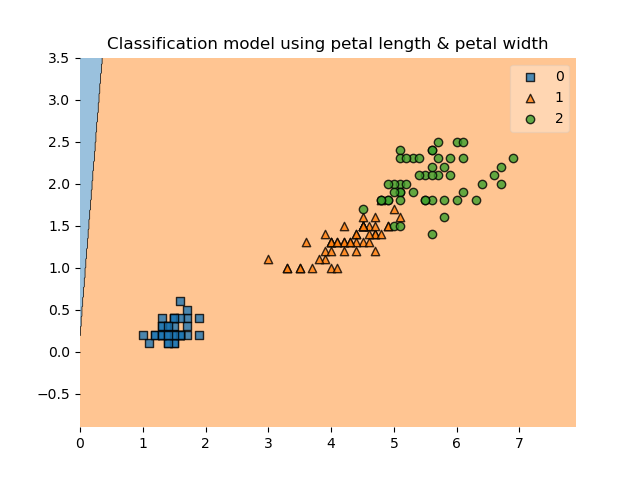

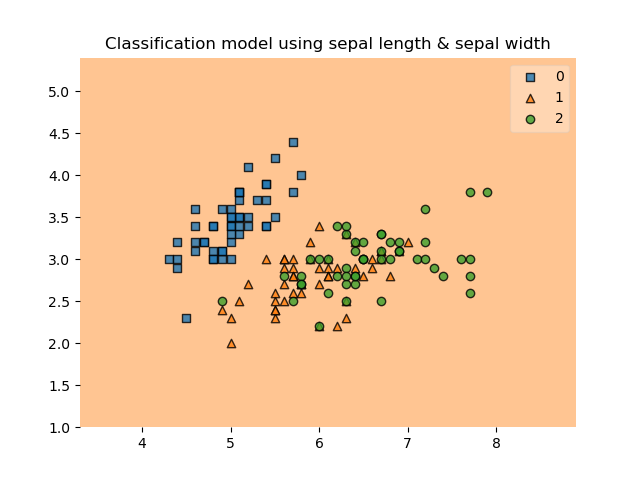

In [5]:
def main():
    x = np.array(iris_df.data)    # Data
    y = np.array(iris_df.target)    # Target
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 42, stratify = y)

    # Calling the logistic regression model
    lr_model = LogisticRegression(0.01, 100)
    
    # Classification model using petal length & petal width
    lr_model.fit(x_train[:, 2:], y_train)
    fig = plt.figure()
    ax = plot_decision_regions(x[:, 2:], y, lr_model)
    fig.add_subplot(ax)
    plt.title('Classification model using petal length & petal width')
    lr_model_classification = lr_model.predict(x_test[:, 2:]) 
    print("Predicted Class:", lr_model_classification)
    print("Actual Class:", y_test)
    print("Model Accuracy using petal length & petal width = ", (accuracy_score(y_test, lr_model_classification) * 100), "%\n")
    
    # Classification model using sepal length & sepal width
    lr_model.fit(x_train[:, 0:2], y_train)
    fig = plt.figure()
    ax = plot_decision_regions(x[:, 0:2], y, lr_model)
    fig.add_subplot(ax)
    plt.title('Classification model using sepal length & sepal width')
    lr_model_classification = lr_model.predict(x_test[:, 0:2])
    print("Predicted Class:", lr_model_classification)
    print("Actual Class:", y_test)
    print("Model Accuracy using sepal length & sepal width = ", (accuracy_score(y_test, lr_model_classification) * 100), "%\n")
    
    # Classification model using all features
    lr_model.fit(x_train, y_train)
    lr_model_classification = lr_model.predict(x_test)
    print("Predicted Class:", lr_model_classification)
    print("Actual Class:", y_test)
    print("Model Accuracy using all features = ", (accuracy_score(y_test, lr_model_classification) * 100), "%\n")

    
if __name__ == "__main__":
    main()

**References**

https://towardsdatascience.com/logistic-regression-from-scratch-in-python-ec66603592e2